# <div style="text-align:center">SVM-SVC-Ensemble</div>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


In [2]:
digits_dataset = datasets.load_digits()
images_and_labels = list(zip(digits_dataset.images, digits_dataset.target))


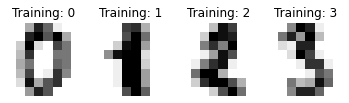

In [3]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [4]:
n_samples = len(digits_dataset.images)
n_samples

1797

In [5]:
data = digits_dataset.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
n_estimators = 500
clf = AdaBoostClassifier(SVC(probability=True,kernel='linear', gamma=0.001),n_estimators=n_estimators)
clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma=0.001, kernel='linear', max_iter=-1,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1.0, n_estimators=500, random_state=None)

In [10]:
expected = digits_dataset.target[n_samples // 2:]
predicted = clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.96      0.90      0.93        91
           2       1.00      0.99      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.93      0.98      0.95        91
           6       0.98      0.99      0.98        91
           7       0.96      0.98      0.97        89
           8       0.90      0.97      0.93        88
           9       0.87      0.96      0.91        92

    accuracy                           0.95       899
   macro avg       0.96      0.95      0.95       899
weighted avg       0.96      0.95      0.95       899

